#Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


In [3]:
iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)', 'petal width (cm)']].values
y_iris = iris.target

In [4]:
dt_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
dt_clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(
dt_clf,
out_file="iris_tree.dot",
feature_names=["petal length (cm)", "petal width (cm)"],
class_names=iris.target_names,
rounded=True,
filled=True
)

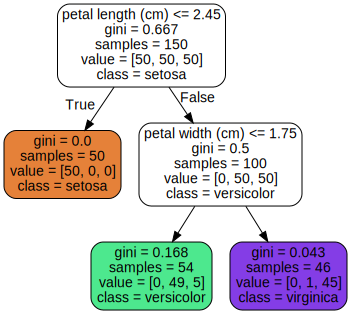

In [7]:
from graphviz import Source
Source.from_file("iris_tree.dot")

#Regularization
We’ll train one decision tree without regularization, and another with
min_samples_leaf=5. Here’s the code;

In [11]:
from sklearn.datasets import make_moons

In [12]:
X_moons,y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [13]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=42)


In [14]:
tree_clf1.score(X_moons_test,y_moons_test)

0.901

In [15]:
tree_clf2.score(X_moons_test,y_moons_test)

0.918

Regularized model works better than unregularized model

most of the time unregularized model overfits and regularized model don't

# Regression

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [9]:
rng = np.random.default_rng(seed=42)
X_quad = rng.random((200, 1)) - 0.5 # a single random input feature
y_quad = X_quad ** 2 + 0.025 * rng.standard_normal((200, 1))

In [10]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

#Lets apply PCA and scalars

In [20]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [22]:
make_pipeline_pca = make_pipeline(PCA(),StandardScaler())
X_iris_rotated = make_pipeline_pca.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)



DecisionTreeClassifier(max_depth=2, random_state=42)